# Ranking analysis for vtalks.net

In [3]:
!pwd

/Users/raul/Projects/vtalks/jupyter


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

In [6]:
# data_source = "../.dataset/vtalks_dataset_2018.csv"
# data_source = "../.dataset/vtalks_dataset_2017.csv"
# data_source = "../.dataset/vtalks_dataset_2016.csv"
# data_source = "../.dataset/vtalks_dataset_2015.csv"
# data_source = "../.dataset/vtalks_dataset_2014.csv"
# data_source = "../.dataset/vtalks_dataset_2013.csv"
# data_source = "../.dataset/vtalks_dataset_2012.csv"
# data_source = "../.dataset/vtalks_dataset_2011.csv"
# data_source = "../.dataset/vtalks_dataset_2010.csv"
data_source = "../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int
    })

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20334 entries, 0 to 20333
Data columns (total 10 columns):
id                        20334 non-null int64
created                   20334 non-null datetime64[ns]
youtube_view_count        20334 non-null int64
youtube_like_count        20334 non-null int64
youtube_dislike_count     20334 non-null int64
youtube_favorite_count    20334 non-null int64
view_count                20334 non-null int64
like_count                20334 non-null int64
dislike_count             20334 non-null int64
favorite_count            20334 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.6 MB


## Youtube Ranking Analysis

### Youtube Wilson score

In [105]:
df = pd.DataFrame({
    'created': data_set.created,
    'id': data_set.id,
    'youtube_like_count': data_set.youtube_like_count,
    'youtube_dislike_count': data_set.youtube_dislike_count,
})

In [108]:
from ranking_sorting.wilson_score import wilson_score

size = len(df.index)
rank_wilson_score = np.zeros(shape=(size,1), dtype=float)
for i, el in enumerate(range(size)):
    ups = df.youtube_like_count[i]
    downs = df.youtube_dislike_count[i]
    rank_wilson_score[i] = wilson_score(ups, downs)
    
df.loc[:, 'rank_wilson_score'] = rank_wilson_score

### Plotting all dataset

,id,rank_wilson_score
count,20334.000000,20334.000000
mean,10181.567572,0.483135
std,5873.637497,0.318734
min,1.000000,0.000000
25%,5097.250000,0.206543
50%,10182.500000,0.510100
75%,15265.750000,0.771840
max,20356.000000,0.996146


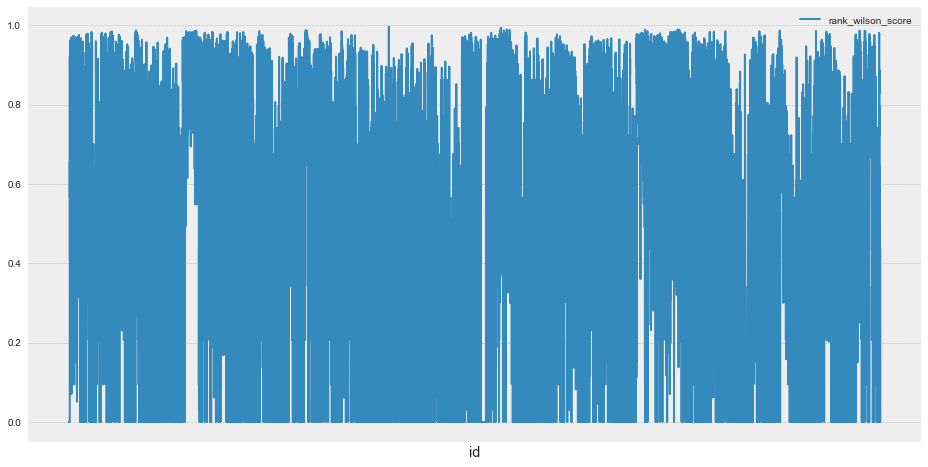

In [115]:
plot_df = pd.DataFrame({
    'id': df.id,
    'rank_wilson_score': df.rank_wilson_score,
})

plot_df.plot(x='id');
plt.xticks([])

plot_df.describe()

### Plotting 2018 dataset

,rank_wilson_score
count,3927.000000
mean,0.432753
std,0.312028
min,0.000000
25%,0.206543
50%,0.438494
75%,0.700847
max,0.996146


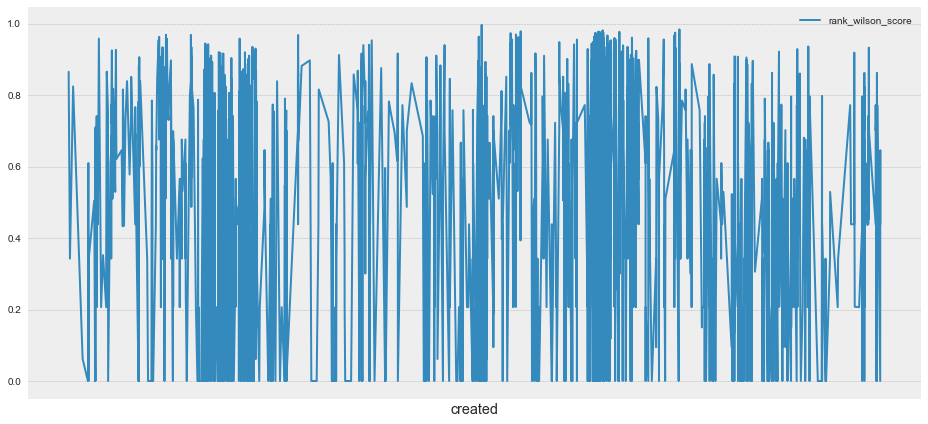

In [114]:
from datetime import date

value_to_check = pd.Timestamp(date.today().year, 1, 1)
filter_mask = df['created'] > value_to_check
filtered_df = df[filter_mask]
filtered_df

plot_df = pd.DataFrame({
    'created': filtered_df.created,
    'rank_wilson_score': filtered_df.rank_wilson_score,
})

plot_df.plot(x='created');
plt.xticks([])

plot_df.describe()

### Plotting current month dataset

,rank_wilson_score
count,136.000000
mean,0.444812
std,0.270330
min,0.000000
25%,0.206543
50%,0.510100
75%,0.645661
max,0.932536


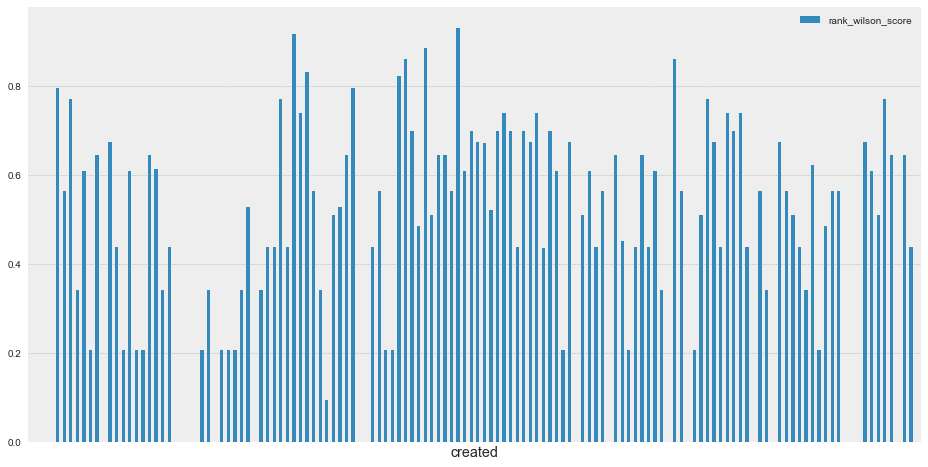

In [117]:
from datetime import date

value_to_check = pd.Timestamp(date.today().year, date.today().month, 1)
filter_mask = df['created'] > value_to_check
filtered_df = df[filter_mask]
filtered_df



plot_df = pd.DataFrame({
    'created': filtered_df.created,
    'rank_wilson_score': filtered_df.rank_wilson_score,
})

plot_df.plot.bar(x='created');
plt.xticks([])

plot_df.describe()